# Gerekli kütüphaneleri dahil etme

In [1]:
#Gerekli kütüphaneleri dahil ediyoruz
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import drive
#google drive 'dan veri setini indiriyoruz
drive.mount("/content/drive",force_remount=True)

dataset_path="/content/drive/MyDrive/dataset"


Mounted at /content/drive


# Resimleri görselleştirme

image:15 without_mask


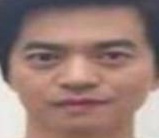

In [45]:
import PIL
import pathlib
import random
#resimleri görselleştirmek için bir fonksiyon oluşturuyoruz
def visualize_image(mask=1):
  if mask==1:
    data_dir = pathlib.Path(dataset_path)
    with_mask = list(data_dir.glob('with_mask/*'))
    random_number=random.randint(1,100)
    print(f"image:{random_number} with_mask")
    with_mask=PIL.Image.open(str(with_mask[random_number]))
    return with_mask

  else:
    data_dir = pathlib.Path(dataset_path)
    without_mask = list(data_dir.glob('without_mask/*'))
    random_number=random.randint(1,100)
    print(f"image:{random_number} without_mask")
    without_mask=PIL.Image.open(str(without_mask[random_number]))
    return without_mask

visualize_image(2)

# Veriyi train test ve validation a ayırma

In [3]:
image_size=(180,180) #resimlerin boyutunu belirliyoruz
batch_size=8 #batch_size i belirliyoruz

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2) #normalize ediyoruz ,validation data nın boyutunu belirliyoruz

train_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training"
) #train verisetini oluşturuyoruz


validation_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
) #validationverisetini oluşturuyoruz


test_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False,
    subset="validation"
)#test_batches setini oluşturuyoruz

Found 1160 images belonging to 2 classes.
Found 290 images belonging to 2 classes.
Found 290 images belonging to 2 classes.


# İlk modelimizi oluşturuyoruz

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten

#Modeli oluşturuyoruz
model_1 = Sequential([
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='sigmoid'),
  Dense(256, activation='sigmoid'),
  Dense(1)
])

In [5]:
opt = tf.keras.optimizers.Adam(lr=0.01)
model_1.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
#modeli compile ediyoruz

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
h = model_1.fit(
    train_batches,
    batch_size=16,
    epochs=10,
    validation_data=test_batches
)
#modeli fit ediyoruz

Epoch 1/10
145/145 [==============================] - 96s 582ms/step - loss: 3.6996e-08 - accuracy: 0.6897 - val_loss: 3.6996e-08 - val_accuracy: 0.6897
Epoch 2/10
145/145 [==============================] - 7s 48ms/step - loss: 3.6996e-08 - accuracy: 0.6897 - val_loss: 3.6996e-08 - val_accuracy: 0.6897
Epoch 3/10
145/145 [==============================] - 7s 48ms/step - loss: 3.6996e-08 - accuracy: 0.6897 - val_loss: 3.6996e-08 - val_accuracy: 0.6897
Epoch 4/10
145/145 [==============================] - 7s 47ms/step - loss: 3.6996e-08 - accuracy: 0.6897 - val_loss: 3.6996e-08 - val_accuracy: 0.6897
Epoch 5/10
145/145 [==============================] - 7s 46ms/step - loss: 3.6996e-08 - accuracy: 0.6897 - val_loss: 3.6996e-08 - val_accuracy: 0.6897
Epoch 6/10
145/145 [==============================] - 7s 47ms/step - loss: 3.6996e-08 - accuracy: 0.6897 - val_loss: 3.6996e-08 - val_accuracy: 0.6897
Epoch 7/10
145/145 [==============================] - 7s 47ms/step - loss: 3.6996e-08 - accu

# Loss u ve Doğruluğu gösteriyoruz

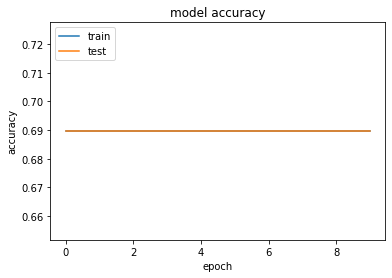

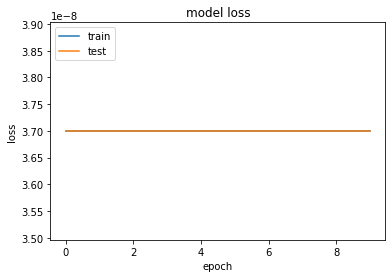

In [7]:
#doğruluğu veri grafiği üzerinde gösteriyoruz
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# lossu veri grafiği üzerinde gösteriyoruz
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Efficient_net modelini kullanıyoruz

In [8]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
#Kendi modelimiz işe yaramadığı için daha önceden eğitilmiş olan efficient net modelini kullanıyoruz.
efficient_net =tf.keras.applications.efficientnet.EfficientNetB3 (
    weights='imagenet',
    input_shape=(180,180,3),
    include_top=False,
    pooling='max'
)

model = Sequential()
model.add(efficient_net)
model.add(Dense(32,
                activation='relu'))
model.add(Dense(64,
                activation = 'relu'))
model.add(Dense(1,
                activation='sigmoid'))

43950080/43941136 [==============================] - 1s 0us/step


In [9]:
model.compile(optimizer=Adam(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
#modeli compileediyoruz

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
history = model.fit_generator(
    train_batches,
    epochs = 50,
    steps_per_epoch = 15,
    validation_data = validation_batches,
    validation_steps = 7
)
#modeli fit ediyoruz

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
15/15 [==============================] - 37s 861ms/step - loss: 0.6048 - accuracy: 0.6417 - val_loss: 0.6147 - val_accuracy: 0.6964
Epoch 2/50
15/15 [==============================] - 5s 308ms/step - loss: 0.2896 - accuracy: 0.8667 - val_loss: 0.6985 - val_accuracy: 0.6250
Epoch 3/50
15/15 [==============================] - 5s 303ms/step - loss: 0.2134 - accuracy: 0.9083 - val_loss: 0.8065 - val_accuracy: 0.6071
Epoch 4/50
15/15 [==============================] - 5s 306ms/step - loss: 0.0696 - accuracy: 0.9833 - val_loss: 0.7308 - val_accuracy: 0.6964
Epoch 5/50
15/15 [==============================] - 5s 305ms/step - loss: 0.2814 - accuracy: 0.9000 - val_loss: 0.7669 - val_accuracy: 0.7143
Epoch 6/50
15/15 [==============================] - 5s 306ms/step - loss: 0.1146 - accuracy: 0.9667 - val_loss: 1.1421 - val_accuracy: 0.7143
Epoch 7/50
15/15 [==============================] - 5s 302ms/step - loss: 0.2348 - accuracy: 0.9000 - val_loss: 1.3373 - val_accuracy: 0.6964
Epoch

# Loss u ve Doğruluğu gösteriyoruz

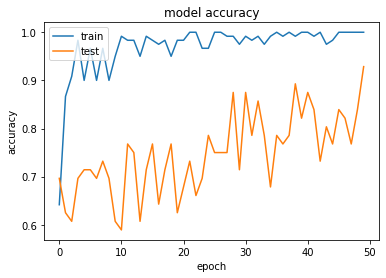

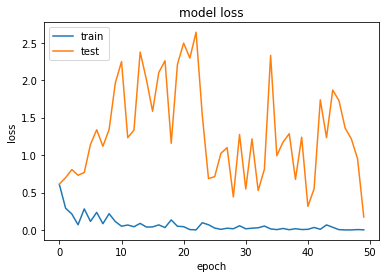

In [11]:
#doğruluğu veri grafiği üzerinde gösteriyoruz
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss  veri grafiği üzerinde gösteriyoruz
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model ile tahmin yapmak


In [24]:
pred=model.predict(train_batches)

image:3 with_mask


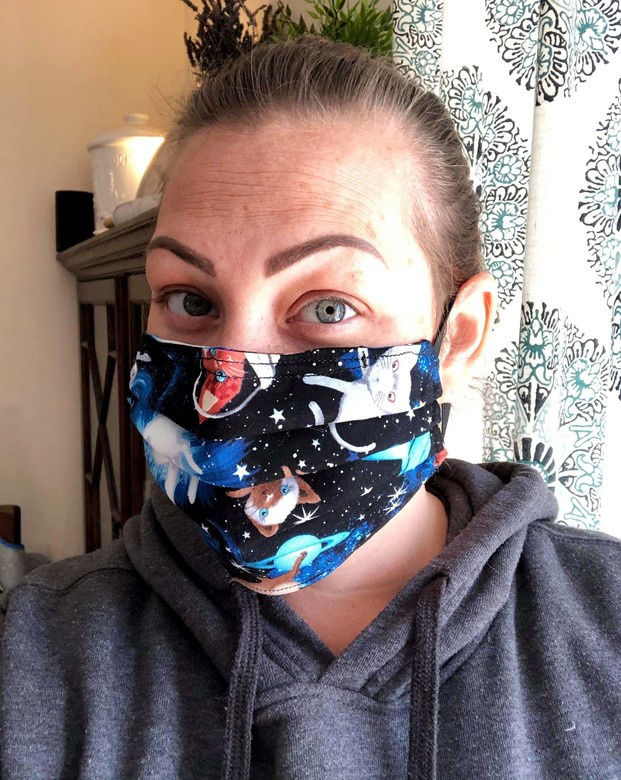

In [51]:
visualize_image(1)

In [52]:
pred[3]

array([0.00038745], dtype=float32)

image:15 without_mask


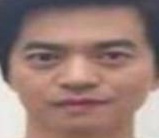

In [53]:
visualize_image(0)

In [54]:
pred[15]

array([0.9986174], dtype=float32)

# Modeli indirmek

In [57]:
model.save('faceMask_detection.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
